# Initial Steps for KPI measurement - Completion Rate

For each group (Test and Control), calculate the number of users who reached the ‘confirm’ step and divide it by the total number of users in that group.

- This gives us the proportion (or probability) of users completing the process.
- Mathematically, for the Test group, the completion rate is given by: 

$ \text{Completion Rate (Test)} = \frac{\text{Number of 'Test' users reaching 'confirm'}}{\text{Total 'Test' users}}$
- The same formula applies for the Control group. This is a direct application of probability where we determine the likelihood of an event (completion) occurring.



The initial steps for data analysis in Python include:

1. **Joining Datasets and Clean:** This involves combining the datasets for analytical purposes.  To measure this KPI, we will need to cocatenate df final web data pt 1 and 2 and df final experiment clients.  
 
2. **Exploratory Data Analysis (EDA):** EDA is a systematic approach to initial data inspection. It leverages **descriptive analysis** techniques to understand the data better, identify outliers, highlight significant variables, and generally uncover underlying data patterns and statistics. Additionally, EDA helps in organizing the data, spotting errors, and assessing missing values.

43. **Visualization:** To build intuitive graphs that show the outcome of the analytics.

# 1. Joining Datasets and Clean

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pt_1 = pd.read_csv('../Data/cleaned_pt_1.csv')
pt_2 = pd.read_csv('../Data/cleaned_pt_2.csv')
experiment = pd.read_csv('../Data/df_final_experiment_clients.txt')

In [4]:
#concatenate pt 1 and pt 2 and experiment and remove duplicated columns
df_kpi = pd.concat([pt_1, pt_2, experiment], axis=1)
df_kpi = df_kpi.loc[:,~df_kpi.columns.duplicated()]

In [5]:
df_kpi

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Control
3,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Control
...,...,...,...,...,...,...
403590,NaN,NaN,NaN,NaN,NaN,NaN
403591,NaN,NaN,NaN,NaN,NaN,NaN
403592,NaN,NaN,NaN,NaN,NaN,NaN
403593,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#count how many rows have missing values
df_kpi.isnull().sum()

client_id        62549
visitor_id       62549
visit_id         62549
process_step     62549
date_time        62549
Variation       353095
dtype: int64

In [7]:
#remove missing values
df_kpi = df_kpi.dropna()

# 2. EDA



In [18]:
# Calculate the number of users reaching 'confirm' step for each group
completion_counts = df_kpi[df_kpi['process_step'] == 'confirm'].groupby('Variation')['visitor_id'].nunique().reset_index(name='confirm_count')

completion_counts

,Variation,confirm_count
0,Control,2879
1,Test,3119


In [19]:
# Calculate the total number of users for each group
total_users = df_kpi.groupby('Variation')['visitor_id'].nunique().reset_index(name='total_users')

total_users

,Variation,total_users
0,Control,8252
1,Test,8535


Merge the 2 dataframe :

In [20]:
# Merge the two dataframes
completion_rates = pd.merge(completion_counts, total_users, on='Variation')

completion_rates

,Variation,confirm_count,total_users
0,Control,2879,8252
1,Test,3119,8535


Add new column 'completion_rate' :

In [21]:
# Calculate the completion rate
completion_rates['completion_rate'] = completion_rates['confirm_count'] / completion_rates['total_users']

completion_rates

,Variation,confirm_count,total_users,completion_rate
0,Control,2879,8252,0.348885
1,Test,3119,8535,0.365436


# 3. Visualization

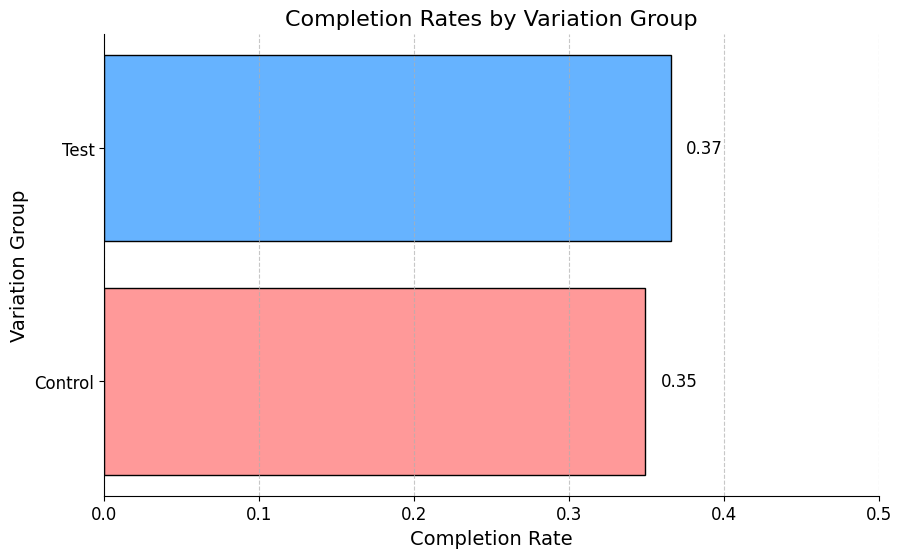

In [15]:
colors = ['#ff9999','#66b3ff']

# Horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(completion_rates['Variation'], completion_rates['completion_rate'], color=colors, edgecolor='black')

# Add data labels
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.01, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='left', va='center', fontsize=12)

# Add title and labels
plt.title('Completion Rates by Variation Group', fontsize=16)
plt.xlabel('Completion Rate', fontsize=14)
plt.ylabel('Variation Group', fontsize=14)

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Enhance visual appeal
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


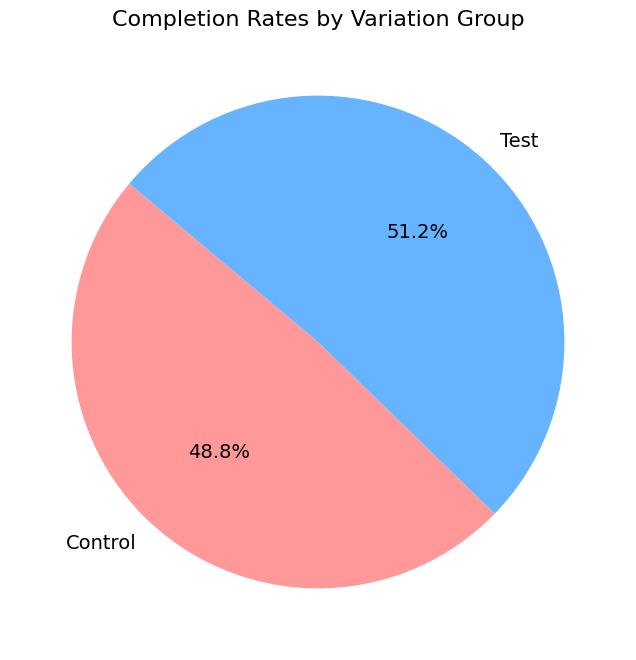

In [16]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(completion_rates['completion_rate'], labels=completion_rates['Variation'], colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Completion Rates by Variation Group', fontsize=16)
plt.show()


Save Completion rate in a file :

In [17]:
completion_rates.to_csv('../Data/completion_rates.csv', index=False)